# X-ray detector calibration using ML


*François Caud (Dataia, Université Paris-Saclay), Marie Andrä, Martin Chauvin, Arkadiusz Dawiec (SOLEIL Synchrotron, Saint Aubin, FRANCE)*

<div>
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td align="left"; style="background-color:transparent; width: 40%;">
        <a href="https://dataia.eu">
            <img src="https://github.com/frcaud/xray_detector/raw/main/pages/DATAIA-h.png" width="450px"/>
        </a>
    </td>
    <td align="right"; style="background-color:transparent; width: 40%;">
        <a href="https://mdls.fr/">
            <img src="https://github.com/frcaud/xray_detector/raw/main/pages/logo_0.png" width="350px"/>
        </a>
    </td>
  </tr>
 </table>
</div>

## Introduction

Research conducted at synchrotron light sources, such as crystallography, X-ray diffraction and
imaging experiments, relies on high-performance detectors with good energy resolution and
signal quality. Single-photon counting hybrid pixel detectors are the preferred choice fulfilling
this need in the tender to hard X-ray regime [1], [2].
A hybrid pixel detector consists of two key components that are bump-bonded together (see
Figure 1): the sensor and the readout chip, typically with tens of thousands up to millions of
pixels. The silicon sensor is the detection layer where incoming photons (X-rays) interact with
the silicon, generating electron-hole pairs. The resulting electrical charge is collected by an array
of electrodes that corresponds to the pixel pattern. The readout chip is a complex, pixelated
ASIC (Application-Specific Integrated Circuit). Each pixel contains an independent electronic
circuit comprising thousands of transistors, which is designed to process the collected charge
signal. “A pixel in a typical single-photon counting detector consists of a charge-sensitive
preamplifier, shaper, comparator, and counter” [2].



<div style="text-align: center; margin-top: 40px; margin-bottom: 40px;">
 
  <img src="https://github.com/frcaud/xray_detector/raw/main/pages/pxl_detector.png" alt="Image 1" width="600" style="display: inline; margin-right: 10px;">
  <img src="https://github.com/frcaud/xray_detector/raw/main/pages/schem_detec.png" alt="Image 2" width="140" style="display: inline;">

  <div style="width: 860px; margin: 0 auto; text-align: center;">
    <strong>Figure 1:</strong> a) Drawing of a typical hybrid pixel detector. The sensor absorbs the X-rays and transmits the created
electrical signal through the bump bonds to the readout  ASIC [1]. b) Simplified schema of a hybrid pixel detector with
the sensor on top (grey), connected to the readout ASIC (green) via bump bonds (grey circles on blue background).
[Figure from R. Dinapoli, Paul-Scherrer-Institute, CH]
   </div>
</div>


In the context of photon-counting detectors, the primary operational mechanism is charge
discrimination. When a photon hits the sensor and generates a charge signal, the circuit in the
corresponding pixel determines if the collected charge exceeds a global electronic threshold. If
so, the pixel increments its internal counter by one. Figure 2 illustrates this principle. Ideally, the
threshold applied by every pixel would be identical. However, due to inherent mismatches in the
semiconductor fabrication process, the thousands of transistors within each pixel circuit do not
behave exactly alike. This results in variations in the effective pixel threshold or preamplifier
gain. This “threshold dispersion, i.e., the accuracy of tuning the threshold at the same energy
level for all the channels” [2], leads to artifacts in the final image and thus reduced data quality.
To counteract these fabrication effects, each pixel is equipped with correction parameters (e.g.,
trim bits) that allow to fine-tune the effective threshold or gain. Therefore, the detector's overall
performance depends on the precise and careful tuning of these numerous parameters across
all pixels.



<div style="text-align: center; margin-top: 40px; margin-bottom: 40px;">

  <img src="https://github.com/frcaud/xray_detector/raw/main/pages/photon_counting.png" alt="Photon counting" width="800" style="display: inline;">

   <div style="width: 700px; margin: 0 auto; text-align: center;">
    <strong>Figure 2:</strong> Principle of a photon counting detector: For each arriving photon, the readout pixel evaluates whether the signal surpasses a set threshold and if so, increases the counter. (Figure adapted from [2])
   </div>
</div>


The standard technique for robust gain correction and energy calibration is the threshold scan,
resulting in so-called S-curves. In a S-curve scan, the global threshold is scanned across a wide
range while the detector is exposed to a monochromatic X-ray beam of known energy. Plotting
the resulting counts against the applied threshold yields an S-shaped curve (a cumulative
distribution function), as shown in Figure 3a. The inflection point of this S-curve corresponds to
the threshold that matches the energy of the incident beam. By finding this inflection point for
every single pixel, the detector can be accurately calibrated to the beam energy. Figure 3 shows
the threshold scans and the resulting distribution of inflection points for an uncorrected (orange)
and a corrected (green) detector. The process involves fitting S-curves to the data (one per pixel,
energy, and gain bit) using an empirical model. This procedure is time-consuming, often
involving multiple scans and generating large quantities of data. Furthermore, empirical fits are
prone to failure, necessitating manual intervention and contributing to lengthy calibration times.



<div style="text-align: center; margin-top: 40px; margin-bottom: 40px;">

  <img src="https://github.com/frcaud/xray_detector/raw/main/pages/threshold_scans.png" alt="Threshold scans" width="800" style="display: inline;">

   <div style="width: 780px; margin: 0 auto; text-align: center;">
    <strong>Figure 3:</strong> a) Comparison of uncorrected (orange) and corrected (green) threshold scans of many pixels of a photon-
counting detector. This example shows how the pixel-by-pixel correction reduces the dispersion of the inflection
points. b) shows the deviation of the pixel inflection points from the mean value.
   </div>
</div>



Given the scale of the parameter space and the duration of traditional fitting routines, there is
significant interest in investigating Machine Learning models to expedite the correction and
calibration process of hybrid pixel detectors. The immediate goal of this challenge is to develop
an ML model capable of quickly and reliably identifying the inflection point in the S-curve data
for each pixel, regardless of beam energy or the presence of noise. Replacing error-prone, time-consuming fits with an ML-based prediction could drastically reduce the time required for
detector correction and calibration, leading to faster calibration procedures and improved data
quality. In the long term, ML could potentially be used to automate the entire correction and
calibration process, making these complex detectors more accessible and efficient for cutting-
edge synchrotron research.


[1] C. Brönnimann and P. Trüb, “Hybrid pixel photon counting X-ray detectors for synchrotron
radiation,” Synchrotron Light Sources Free-Electron Lasers Accel. Phys. Instrum. Sci. Appl.,
pp. 1191–1223, Jan. 2020, doi: 10.1007/978-3-030-23201-6_36/FIGURES/16.
[2] E. Fröjdh, A. Bergamaschi, and B. Schmitt, “Single-photon counting detectors for diffraction-
limited light sources,” Front. Phys., vol. 12, p. 1304896, 2024, doi:
10.3389/FPHY.2024.1304896.

## Data exploration

In phase 1 (development phase) of the competition, the split of data is as follow:
- All 10keV (X_train, y_train) are used as training data -> 10keV data represent **source domain**
- A subset of 12keV unlabeled data (X_adapt) is the domain adaptation training data -> 12keV data represent **target domain**
- The rest of 12keV data (X_test, y_test) are test data

All data from phase 1 are public and given in the starting kit. We give 12keV test labels for local testing but **you shouldn't** use those labels for you DA task, otherwise your model will not work on phase 2 !

In phase 2 the split is the same but replacing 10keV by 12keV and 12keV by 18keV unseen data:
- All 12keV data will be used as training data
- A subset of 18keV data (X_adapt) is DA training data
- The rest of 18keV data (X_test, y_test) are test data

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Downloading public data

In [2]:
# uncomment the following line to download the data
# !python download_data.py

### Loading data

In [3]:
input_dir = 'data/dev_phase/input_data'
reference_dir = 'data/dev_phase/reference_data'

A function to load data. It is the same function used in the ingestion program.

In [4]:
def get_data():
    """ Get X_train, y_train, X_adapt and X_test from csv files
    """
    # Read datad/reference
    X_train = pd.read_csv(os.path.join(input_dir, 'train.csv'), header=None)
    y_train = pd.read_csv(os.path.join(input_dir, 'train_labels.csv'), header=None)
    X_adapt = pd.read_csv(os.path.join(input_dir, 'train_DA.csv'), header=None)
    X_test = pd.read_csv(os.path.join(input_dir, 'test.csv'), header=None)
    # Convert to numpy arrays
    X_train, y_train, X_adapt, X_test = np.array(X_train), np.array(y_train), np.array(X_adapt), np.array(X_test)
    y_train = y_train.ravel()
    return X_train, y_train, X_adapt, X_test

In [7]:
X_train, y_train, X_adapt, X_test = get_data()

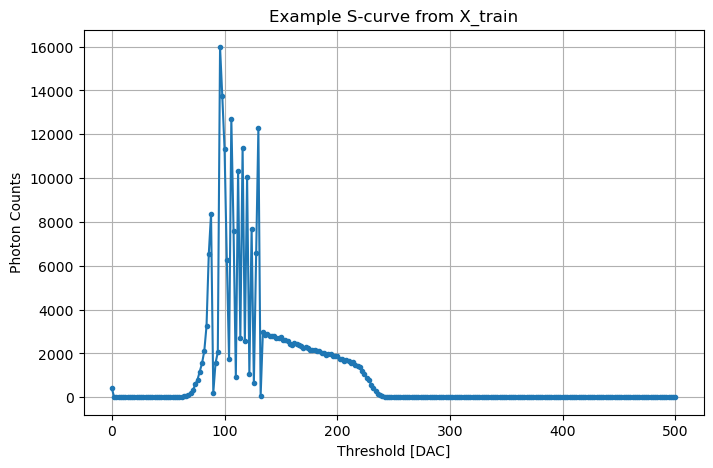

In [8]:
import matplotlib.pyplot as plt

example_idx = 0
s_curve = X_train[example_idx]

thr_vector = np.arange(0, 501, 2) # Threshold scan taken every 2 DAC units
plt.figure(figsize=(8, 5))
plt.plot(thr_vector, s_curve, marker='o', markersize=3)
plt.title("Example S-curve from X_train")
plt.xlabel("Threshold [DAC]")
plt.ylabel("Photon Counts")
plt.grid(True)
plt.show()


Position of the inflection point:

In [9]:
print(y_train[example_idx])

228.0


In [10]:
X_train.shape, y_train.shape, X_adapt.shape, X_test.shape

((65448, 251), (65448,), (19652, 251), (45857, 251))

In [11]:
X_train

array([[421.,   7.,  10., ...,   0.,   0.,   0.],
       [411.,   2.,   5., ...,   0.,   0.,   0.],
       [411.,   6.,   2., ...,   0.,   0.,   0.],
       ...,
       [410.,   4.,   3., ...,   0.,   0.,   0.],
       [409.,   4.,   5., ...,   1.,   1.,   0.],
       [416.,   3.,   7., ...,   0.,   0.,   0.]], shape=(65448, 251))

In [12]:
y_train

array([228., 230., 223., ..., 234., 250., 231.], shape=(65448,))

### Source and target domains

Since the beam energy is different in the two domains, it leads to a shift in the optimal threshold in the S-curves.
A good model would be able to leverage the adaptation data and predict on target domain even if no target domain labels were seen at training time.

In [13]:
#loading test data
y_test = pd.read_csv(os.path.join(reference_dir, 'test_labels.csv'), header=None)
y_test = np.array(y_test)
y_test = y_test.ravel()

In [14]:
y_test.shape

(45857,)

10 keV: mean=229.62, std=7.19
12 keV: mean=254.86, std=7.41


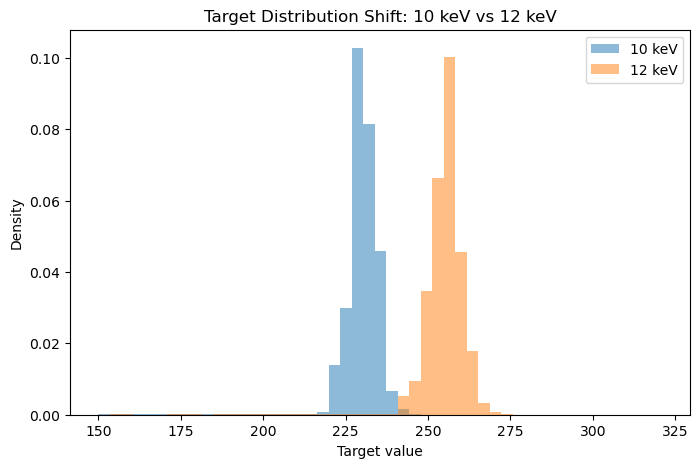

KL divergence (12 keV || 10 keV): 13.4159


In [15]:
# targets
y_10keV = y_train
y_12keV = y_test

# ---- 1. Basic statistics ----
mean_10, std_10 = y_10keV.mean(), y_10keV.std()
mean_12, std_12 = y_12keV.mean(), y_12keV.std()
print(f"10 keV: mean={mean_10:.2f}, std={std_10:.2f}")
print(f"12 keV: mean={mean_12:.2f}, std={std_12:.2f}")

# ---- 2. Histogram plot ----
plt.figure(figsize=(8,5))
bins = np.linspace(min(y_10keV.min(), y_12keV.min()), max(y_10keV.max(), y_12keV.max()), 50)
plt.hist(y_10keV, bins=bins, alpha=0.5, label='10 keV', density=True)
plt.hist(y_12keV, bins=bins, alpha=0.5, label='12 keV', density=True)
plt.xlabel('Target value')
plt.ylabel('Density')
plt.title('Target Distribution Shift: 10 keV vs 12 keV')
plt.legend()
plt.show()

# ---- 3. Quantify shift: KL divergence ----
# Add a small value to avoid division by zero
hist_10, _ = np.histogram(y_10keV, bins=bins, density=True)
hist_12, _ = np.histogram(y_12keV, bins=bins, density=True)
hist_10 += 1e-8
hist_12 += 1e-8
kl_div = entropy(hist_12, hist_10)  # KL(12 || 10)
print(f"KL divergence (12 keV || 10 keV): {kl_div:.4f}")


## Model training on 10keV data

Simple random forest model:

In [16]:
# Simple  model using Random Forest
def simple_model(X, y, test_size=0.2, random_state=42):
    """
    Simple model for predicting inflection points from S-curves
    """
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Train a simple Random Forest model
    model = RandomForestRegressor(
        n_estimators=30,
        max_depth=5,
        random_state=random_state,
        n_jobs=-1
    )
    
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R²: {r2:.3f}")
    print(f"Test RMSE: {rmse:.2f}")
    
    # Plot predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Inflection Points')
    plt.ylabel('Predicted Inflection Points')
    plt.title('Predicted vs Actual Inflection Points')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return model, (X_test, y_test, y_pred)

Test MSE: 2.17
Test R²: 0.960
Test RMSE: 1.47


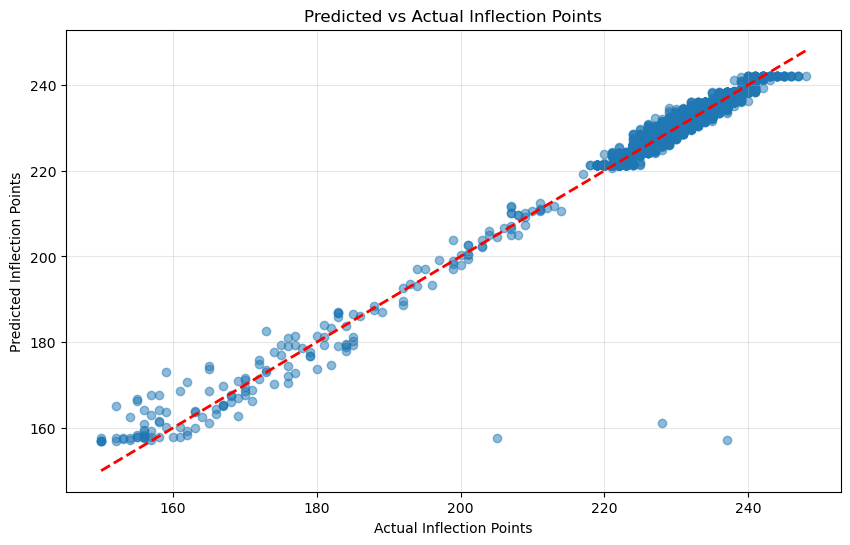

In [17]:
model, _ = simple_model(X_train, y_train)

The task is trivial if we just use data at one beam energy.

Let's test thsi model on 12keV data:

In [18]:
# Testing the model trained on 10keV data on 12keV data:
y_pred_12keV = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_12keV)
r2 = r2_score(y_test, y_pred_12keV)
rmse = np.sqrt(mse)
print(f"Test MSE: {mse:.2f}")

Test MSE: 199.24


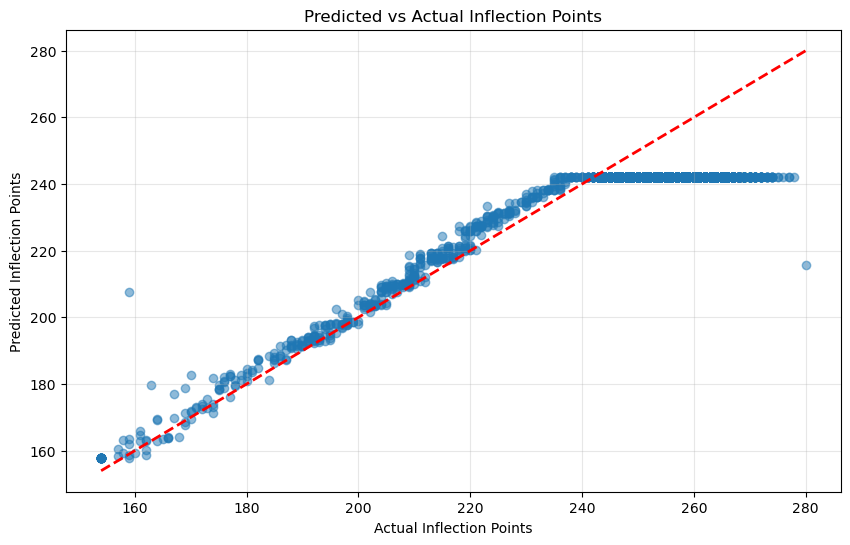

In [19]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_12keV, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Inflection Points')
plt.ylabel('Predicted Inflection Points')
plt.title('Predicted vs Actual Inflection Points')
plt.grid(True, alpha=0.3)
plt.show()

Here we see that this model cannot deal with the shift in data from source to target domain. And the generalization on 18keV data would be even worse !

## Baseline DA model

We will use Skada library (https://scikit-adaptation.github.io)

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from skada import CORALAdapter, make_da_pipeline


class Model:
    def __init__(self):
        """ Initialize the model.
        """
        self.regressor = RandomForestRegressor(
            n_estimators=30,
            max_depth=5,
            random_state=42,
            n_jobs=-1
        )
        
        self.coral_adapter = CORALAdapter()
        
        self.pipe = make_da_pipeline(
            self.coral_adapter,
            self.regressor
        )
        

    def fit(self, X, y, X_adapt):
        """ Train the model.

        Args:
            X: Training data matrix of shape (num-samples, num-features), type
            np.ndarray.
            y: Training label vector of shape (num-samples), type np.ndarray.
            X_adapt: DA training data matrix of shape (num-samples-DA, num-features),
            type np.ndarray.
        """
        X_train = np.concatenate([X, X_adapt], axis=0)
        y_train = np.concatenate([
        	y.astype(float).ravel(),
        	np.full(X_adapt.shape[0], np.nan)
        ])
        sample_domain = np.concatenate([np.zeros(len(X)), -np.ones(len(X_adapt))])
        sample_domain = sample_domain.astype(int)
        self.pipe.fit(X_train, y_train, sample_domain=sample_domain)   

    def predict(self, X):
        """ Predict the labels.

        Args:
          X: Test data matrix of shape (num-samples, num-features) to pass to the
          model for inference, type np.ndarray.
        """
        y = self.pipe.predict(X)
        return y


In [21]:
m = Model()

In [22]:
m.fit(X_train, y_train, X_adapt)

In [23]:
y_pred = m.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: {}'.format(mse))

MSE: 582.0924757208984


Your model should beat this score on the competition leaderboard. Have a nice competition !